# Modeling

This is a classification problem in supervised learning. We will evaluate below classification algorithms:  
1. Logistic Regression  
2. K-Nearest Neighbors (KNN)  
3. Support vector machine (SVM)  
4. Random Forest  
5. Naive Bayes  
6. Gradient Boost

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [2]:
X_train = pd.read_csv('X_train.csv')
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv',squeeze=True)
y_test = pd.read_csv('y_test.csv',squeeze=True)

In [3]:
X_train_scaled.head()

,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM,Country_Austria,Country_Belgium,Country_Channel Islands,...,Country_Poland,Country_Portugal,Country_RSA,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.189700,0.298513,-0.423252,-0.421507,-0.241232,-0.240966,0.040443,-0.047246,-0.054575,-0.038561,...,-0.027257,-0.054575,-0.027257,-0.06689,-0.047246,-0.027257,-0.027257,-0.027257,0.280112,-0.047246
1,0.358565,-0.535714,-0.154327,-0.421507,-0.117397,-0.240966,-0.585732,-0.047246,-0.054575,-0.038561,...,-0.027257,-0.054575,-0.027257,-0.06689,-0.047246,-0.027257,-0.027257,-0.027257,0.280112,-0.047246
2,-1.217697,1.132741,8.989119,5.472296,3.741099,5.883216,3.797499,-0.047246,-0.054575,-0.038561,...,-0.027257,-0.054575,-0.027257,-0.06689,-0.047246,-0.027257,-0.027257,-0.027257,0.280112,-0.047246
3,-0.498099,0.298513,-0.154327,-0.421507,-0.157006,-0.240966,0.040443,-0.047246,-0.054575,-0.038561,...,-0.027257,-0.054575,-0.027257,-0.06689,-0.047246,-0.027257,-0.027257,-0.027257,0.280112,-0.047246
4,-1.183430,1.132741,0.114598,-0.421507,-0.146612,-0.240966,0.666619,-0.047246,-0.054575,-0.038561,...,-0.027257,-0.054575,-0.027257,-0.06689,-0.047246,-0.027257,-0.027257,-0.027257,0.280112,-0.047246


### Baseline Model

We create a simple baseline classifier here to compare with other real classifiers.

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score

dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)

print('The accuracy score of our dummy classifier is {}'.format(round(dummy.score(X_test,y_test),2)))
print('The balanced accuracy score of our dummy classifier is {}'.format(round(balanced_accuracy_score(y_test,y_pred),2)))

The accuracy score of our dummy classifier is 0.9
The balanced accuracy score of our dummy classifier is 0.33


We can see that the accuracy of the baseline model is 0.9, but the balanced accuracy is only 0.33 due to the imbalanced dataset. Classification problems having multiple classes with imbalanced dataset present a different challenge. In order to address this issue, we will use balanced accuracy as the score method for model training

### 1. Logistic Regression

Some combinations were omitted to cut back on the warnings/errors.

In [5]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 

lr = LogisticRegression(max_iter=1000,random_state=0)
param_distributions = {
                        'C': [0.01,0.1,1,10,100],
                        'penalty': ['l1','l2'],
                        'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}
search = RandomizedSearchCV(lr,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [6]:
lr = search.best_estimator_
# lr.score(X_test_scaled,y_test)

### 2. K-Nearest Neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_distributions = {
                        'n_neighbors': list(range(1,21,2)),
                        'weights': ['uniform','distance'],
                        'metric': ['euclidean','manhattan','minkowski']
}
search = RandomizedSearchCV(knn,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'manhattan'}

In [8]:
knn = search.best_estimator_
# knn.score(X_test_scaled,y_test)

### 3. Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVC

svc = SVC(probability=True)
param_distributions = {
                        'C': [0.1, 1, 10, 100],
                        'kernel': ['linear','poly','rbf','sigmoid'],
                        'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]
}
search = RandomizedSearchCV(svc,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train_scaled,y_train)
search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


{'kernel': 'linear', 'gamma': 0.01, 'C': 100}

In [10]:
svc = search.best_estimator_
# svc.score(X_test_scaled,y_test)

### 4. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
param_distributions = {
                        'n_estimators': [10, 100, 1000],
                        'criterion': ['gini','entropy'],
                        'max_features': [1,5,10,15,20]
}
search = RandomizedSearchCV(rf,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    4.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.0s finished


{'n_estimators': 1000, 'max_features': 15, 'criterion': 'gini'}

In [12]:
rf = search.best_estimator_
# rf.score(X_test,y_test)

### 5. Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
param_distributions = {'var_smoothing': np.logspace(0,-9, num=5)}
search = RandomizedSearchCV(nb,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


{'var_smoothing': 1e-09}

In [14]:
nb = search.best_estimator_
# nb.score(X_test,y_test)

### 6. Gradient Boost - XGBoost

In [15]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
param_distributions = {
                        'learning_rate': [0.001,0.01,0.1],
                        'max_depth': [2,5,10,20],  
                        'gamma': [0.05,0.1,0.5,1],
                        'reg_lambda': [0.01,0.1,1],
                        'reg_alpha': [0,0.1,0.5,1],
                        'subsample': [0.6,0.8,1],
                        'colsample_bytree': [0.6,0.8,1]
}
search = RandomizedSearchCV(xgb,param_distributions,scoring='balanced_accuracy',cv=5,random_state=0,verbose=2,n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


{'subsample': 1,
 'reg_lambda': 1,
 'reg_alpha': 1,
 'max_depth': 10,
 'learning_rate': 0.001,
 'gamma': 1,
 'colsample_bytree': 1}

In [16]:
xgb = search.best_estimator_
# xgb.score(X_test,y_test)

### Model Performance Comparison

Since this is an imbalanced dataset and we want to make sure that all classes contribute equally to the average, so we choose macro average for the metrics.  
  
We will use below metrics to compare our models:  
- Balanced Accuracy  
- Macro-Averaged Precision  
- Macro-Averaged Recall  
- Macro-Averaged F1
- ROC-AUC (OvO scheme)

In [17]:
# Define dictionary with performance metrics
scoring = {'accuracy':'balanced_accuracy', 
           'precision':'precision_macro',
           'recall':'recall_macro', 
           'f1':'f1_macro',
           'roc-auc':'roc_auc_ovo'}

In [18]:
from sklearn.model_selection import cross_validate

# Define the models evaluation function
def models_evaluation(X, X_scaled, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    models = [dummy,lr,knn,svc,rf,nb,xgb]
    columns=['Baseline','Logistic Regression','K-Nearest Neighbor','Support Vector Machine','Random Forest','Naive Bayes','XGBoost']
    models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])
    
    # Perform cross-validation to each machine learning classifier
    for model, column in zip(models, columns):
        
        if model in [lr,knn,svc]:
            cv = cross_validate(model, X_scaled, y, cv=folds, scoring=scoring)
        else:
            cv = cross_validate(model, X, y, cv=folds, scoring=scoring)

        # Create a data frame with the models perfoamnce metrics scores
        models_scores_table[column] = [scores.mean() for scores in cv.values()][2:]
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [19]:
models_evaluation(X_train, X_train_scaled, y_train, 5)

,Baseline,Logistic Regression,K-Nearest Neighbor,Support Vector Machine,Random Forest,Naive Bayes,XGBoost,Best Score
Accuracy,0.333333,0.560732,0.611121,0.585866,0.615754,0.680230,0.645276,Naive Bayes
Precision,0.290771,0.707158,0.750281,0.735226,0.705380,0.642012,0.769571,XGBoost
Recall,0.333333,0.560732,0.611121,0.585866,0.615754,0.680230,0.645276,Naive Bayes
F1 Score,0.310600,0.599440,0.653152,0.630629,0.646898,0.655291,0.670927,XGBoost
ROC-AUC,0.500000,0.753235,0.750969,0.734477,0.822223,0.824866,0.814786,Naive Bayes


### Final Model Evaluation

From the model performance comparison table above, we can see that Naive Bayes and XGBoost models are more effective in predicting the LTV clusters. We will further evaluate these two models.

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#### Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       405
           1       0.49      0.59      0.53        41
           2       0.50      0.75      0.60         4

    accuracy                           0.91       450
   macro avg       0.65      0.76      0.70       450
weighted avg       0.92      0.91      0.91       450



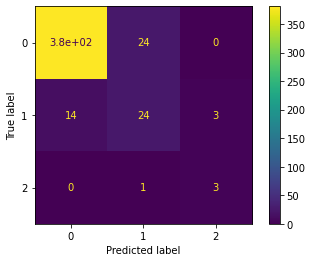

In [21]:
# classification report
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

# plot the confusion matrix
plot_confusion_matrix(nb,X_test,y_test)

#### Gradient Boost - XGBoost

              precision    recall  f1-score   support

           0       0.95      0.99      0.96       405
           1       0.65      0.32      0.43        41
           2       0.38      0.75      0.50         4

    accuracy                           0.92       450
   macro avg       0.66      0.68      0.63       450
weighted avg       0.91      0.92      0.91       450



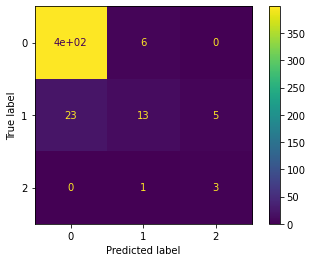

In [22]:
# classification report
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

# plot the confusion matrix
plot_confusion_matrix(xgb,X_test,y_test)

### Conclusion

It's import for businesses to identify their high LTV customers and establish specific marketing strategies for these customers. The Naive Bayes and XGBoost models both successfully identified 75% of actual high LTV (cluster 2) customers (recall), but Naive Bayes did a better job identifying mid LTV (cluster 1) customers. We will choose the Gaussian Naive Bayes model as the final model.

In [25]:
import pickle

# saving the model
with open('gaussian naive bayes model', 'wb') as file:
    pickle.dump(nb,file)

### Next Steps

The final model only correctly identified 59% mid LTV customers in our test dataset. There is certainly room for improvement.

Possible actions to improve: 
- Adding more features and improve feature engineering  
- Add more data to the model if possible

There are also various techniques we can adopt to improve the model performance of imbalanced datasets:
- Under-sampling: Remove samples from over-represented classes
- Over-sampling: Add more samples from under-represented classes